In [74]:
# Our three global feature descriptors are

#1. Color Histogram that quantifies color of the flower.
#2. Hu Moments that quantifies shape of the flower.
#3. Haralick Texture that quantifies texture of the flower.

# imports the necessary libraries we need to work with.
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import metrics
# from skimage import feature
from numpy import asarray
import seaborn as sn
import pandas as pd
import numpy as np
import mahotas
import h5py
import cv2
import os
print("[Status]: Done")

[Status]: Done


In [2]:

dataset_path       = "Dataset\FlowerSpecies"
csv_data         = "output\data.csv"
bins             = 8
print("[Status]: Done")

[Status]: Done


In [3]:
# Total we have 532 features
print("Dataset")
dataset = pd.read_csv(csv_data, index_col=False)
dataset

Dataset


0         1         2         3         4         5         6  \
0    0.184988  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.009137  0.027607  0.035892  0.025877  0.022856  0.005409  0.000171   
2    0.025545  0.138692  0.097419  0.029746  0.006570  0.001734  0.000611   
3    0.307502  0.067096  0.036739  0.038602  0.027459  0.009694  0.002173   
4    0.034159  0.001364  0.001918  0.005391  0.001151  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
635  0.023570  0.001061  0.000645  0.000516  0.000301  0.000330  0.000530   
636  0.000278  0.000080  0.000222  0.001112  0.001916  0.004721  0.010931   
637  0.000000  0.000000  0.000000  0.000000  0.000019  0.000019  0.000047   
638  0.000344  0.000021  0.000021  0.000021  0.000064  0.000086  0.000150   
639  0.004208  0.004558  0.003740  0.002454  0.003010  0.006458  0.002717   

            7         8         9  ...       523       524       525  \
0    0.000000  0.000196  0.000000  ... -0.356179  0.997427  0.001392   
1    0.000000  0.019469  0.055142  ... -0.417826  0.998729  0.001285   
2    0.000586  0.064938  0.329428  ... -0.378930  0.998083  0.001404   
3    0.002518  0.070476  0.102248  ... -0.397676  0.998856  0.001157   
4    0.000000  0.031602  0.035011  ... -0.327613  0.996585  0.001032   
..        ...       ...       ...  ...       ...       ...       ...   
635  0.000201  0.002007  0.001649  ... -0.316020  0.988116  0.002790   
636  0.996832  0.000080  0.000309  ... -0.365934  0.983226  0.000849   
637  0.009369  0.000000  0.000000  ... -0.411821  0.998317  0.001715   
638  0.001096  0.000774  0.000430  ... -0.161884  0.955194  0.001394   
639  0.008240  0.005143  0.013412  ... -0.250289  0.988823  0.001507   

              526           527           528           529           530  \
0    1.294344e-08  1.576264e-11  2.362576e-11  1.675599e-22  7.093943e-16   
1    3.999153e-08  1.308353e-11  1.240816e-12 -4.659802e-24  1.908378e-16   
2    6.409473e-09  5.603493e-11  4.478482e-11 -1.693046e-21  3.361158e-15   
3    2.324336e-08  1.817932e-11  6.867838e-12 -7.173048e-23 -9.329776e-16   
4    6.045409e-10  4.703091e-12  2.804578e-12  1.018531e-23 -6.855849e-17   
..            ...           ...           ...           ...           ...   
635  9.844702e-09  7.978470e-11  2.652328e-11  9.994940e-22  1.477162e-15   
636  8.034375e-11  1.777115e-13  3.491700e-13  6.225078e-26 -2.705756e-18   
637  3.520274e-08  1.711992e-10  1.026496e-10  4.470081e-21 -1.623771e-14   
638  1.191749e-08  2.597839e-12  5.991171e-12 -2.830118e-24  2.371580e-16   
639  5.467921e-08  3.252038e-11  7.953059e-11 -3.327011e-21  1.692712e-14   

              531     target  
0   -4.240178e-22  ColisFoot  
1   -1.811318e-24  ColisFoot  
2    1.472031e-21  ColisFoot  
3   -2.727063e-23  ColisFoot  
4    9.447483e-26  ColisFoot  
..            ...        ...  
635  6.997797e-22  Tigerlily  
636  6.074652e-26  Tigerlily  
637  1.285261e-20  Tigerlily  
638 -2.346594e-23  Tigerlily  
639 -2.300012e-21  Tigerlily  

[640 rows x 533 columns]

In [267]:
X = dataset.iloc[ : , :-1]
print("store features values into x ", X.shape)
Y = dataset.target
print("store features values into y ", Y.shape)

print("No of the features: ", np.array(X).shape[1])
print("Fearture vector size: ", np.array(X).shape)
print("Lables size[Target]: ", np.array(Y).shape)
# print("Lables [Target]: ", np.array(Y))

store features values into x  (640, 532)
store features values into y  (640,)
No of the features:  532
Fearture vector size:  (640, 532)
Lables size[Target]:  (640,)


In [268]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_rescaled = scaler.fit_transform(X)
print("[STATUS] feature vector normalized...")
print(pd.DataFrame(x_rescaled).shape)
# x_plot = pd.DataFrame(x_rescaled)
# x_plot.plot.kde()
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(Y)
# print(target)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(np.reshape(target, (-1, 1)))
# print(onehot)
# temp = encoder.inverse_transform(onehot)
# print(temp)
targetNames = np.unique(Y)
print("Target values are: ", target)
print("Target Shape: ", target.shape)
print("Target Names are: ", targetNames)
print("[STATUS] training labels encoded...")

[STATUS] feature vector normalized...
(640, 532)
Target values are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 

In [260]:
from sklearn.model_selection import train_test_split
train_frac = 0.7  #60%   left ->: 100-60 = 40%
valid_frac = 0.5 #(100/20)*10
test_frac = 0.5 #(100/20)*10

x_train, x_rem, y_train, y_rem = train_test_split(x_rescaled, onehot, train_size=train_frac)
# x_train, x_rem, y_train, y_rem = train_test_split(x_rescaled, target, train_size=train_frac)
x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=test_frac)
print("Train vector size: ", x_train.shape, y_train.shape)
print("Test vector size: ", x_test.shape, y_test.shape)
print("Validation vector size: ", x_valid.shape, y_valid.shape)

Train vector size:  (448, 532) (448, 8)
Test vector size:  (96, 532) (96, 8)
Validation vector size:  (96, 532) (96, 8)


In [255]:
import numpy as np

# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(z, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        bound = 1/(1+ np.exp(- z))*(1-1/(1+ np.exp(- z)))
    else : # sigmoid
        bound = 1/(1+ np.exp(- z))
    
    return bound

def MLP_pred(X_test, w1, b1, w2, b2):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop for all samples
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = sigmoid_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = sigmoid_act(np.dot(w2, z1) + b2) # output layer 2
       

        # Append the prediction;
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append(np.array(np.where(z2 >= 0.5 , 1, 0)))  
    return np.array(pred);

def MLP(X_train, Y_train, hidden_neurons = 2, epoch = 100, alpha = 0.5, prnt = False):
    # Set up the number of perceptron per each layer:
    p = hidden_neurons # Layer 1 (Hidden layer)
    q = y_train.shape[1] # Layer 2 (Output layer)
    total_samples = X_train.shape[0]


    # 0: Random initialize
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1(Hindden layer)
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2(output layer)
    b2 = np.random.rand(q)
    jw = 0
    cost_list = list()
    epoch_list = list()
    train_accuracy_list = list()
    test_accuracy_list = list()
    
    # Start looping over the samples..
    for e in range(epoch):
      jw = 0
      for I in range(0, X_train.shape[0]): #loop in all the samples
          
          # 1: input the data 
          x = X_train[I]
          
          # 2: Start the algorithm
          # 2.1: Feed forward
          z1 = sigmoid_act(np.dot(w1, x) + b1) # output layer 1 
          
          z2 = sigmoid_act(np.dot(w2, z1) + b2) # output layer 2
          
          #2.3: Backpropagate
          delta_2 = (z2-Y_train[I]) * sigmoid_act(z2, der=True) # Output Layer Error
          delta_1 = np.dot(delta_2, w2) * sigmoid_act(z1, der=True) # Hidden Layer Error
          
          w2 = w2 - alpha*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2(Output)
          b2 = b2 - alpha*delta_2
          
          w1 = w1 - alpha*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
          b1 = b1 - alpha*delta_1
          
          # 4. Computation of the loss function
          jw = jw + (1/2)*np.sum((z2-Y_train[I])**2)
        
            
      jw = (jw)/(total_samples)
      if e%10 == 0: # at every 10th iteration record the cost and epoch value
         cost_list.append(jw)
         epoch_list.append(e+1)  
         ############################################################
         y_pred_train = MLP_pred(x_train, w1, b1, w2, b2)
         y_pred_test = MLP_pred(x_test, w1, b1, w2, b2)
         accuracy_train = accuracy_score(y_train, y_pred_train)
         accuracy_test = accuracy_score(y_test, y_pred_test)
         train_accuracy_list.append(accuracy_train)
         test_accuracy_list.append(accuracy_test)
         if prnt == True:
             print("Epoch: ", e+1, "-->", "Train Accuracy: ", "{:.2f}".format(accuracy_train),  " Test Accuracy: ","{:.2f}".format( accuracy_test), "Train Cost: ",  "{:.2f}".format(jw))
             #print("Epoch : ", i, " ----> ",, "Cost : ", jw)
             print("-"*100)
        ###############################################################  
        
    return w1, b1, w2, b2, jw, train_accuracy_list, test_accuracy_list, cost_list, epoch_list


def kfold_cv(X, Y, fs = 5, epoch = 100, alpha = 0.5):
  kfold = []
  train_accuracy = []
  test_accuracy = []
  test_cost = []
  kfold_list = []
  X, Y = shuffle(X, Y)
  fold_size = fs
  strtfdKFold = StratifiedKFold(n_splits=fold_size)
  kfold = strtfdKFold.split(X, Y)
  scores = []
  e = epoch
  a = alpha
  total_cost = 0
  for k, (train, test) in enumerate(kfold):
    print("*"*20, "KFold - ",k +1,  "*"*20)
    x_ftrain, y_ftrain = X[train], Y[train]
    x_ftest, y_ftest = X[test], Y[test]
    encoder = OneHotEncoder(sparse=False)
    # transform data
    y_ftrain = encoder.fit_transform(np.reshape(y_ftrain, (-1, 1)))
    y_ftest =  encoder.fit_transform(np.reshape(y_ftest, (-1, 1)))
    w1, b1, w2, b2, jw, train_accuracy_list, test_accuracy_list, cost_list, epoch_list = MLP(x_ftrain, y_ftrain,20, e, a, False)
    y_pred_test =  MLP_pred(x_ftest, w1, b1, w2, b2)
    y_pred_train =  MLP_pred(x_ftrain, w1, b1, w2, b2)
#     y_pred_test_inverse = encoder.inverse_transform(y_pred_test)
#     y_actual_test_inverse = encoder.inverse_transform(y_ftest)
#     print('Confusion Matrix : \n' + str(confusion_matrix(y_actual_test_inverse, y_pred_test_inverse)))
    # print('Confusion Matrix For Test Data set : \n')
    # cm = confusion_matrix(y_actual_test_inverse, y_pred_test_inverse)
    # plt.figure(figsize = (10,7))
    # # cmap= "Greens_r"
    # # cmap= "OrRd_r"
    # # cmap= "OrRd"
    # sn.heatmap(cm, annot=True,cmap="Greens_r")
#     print("Classification Report for 3-classes: ")
#     print(classification_report(y_ftest, y_pred_test))
    accuracy_test = accuracy_score(y_ftest, y_pred_test)
    accuracy_train = accuracy_score(y_ftrain, y_pred_train)
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)
    kfold_list.append(k+1)
    print("Train Accuracy: ", accuracy_train)
    print("Test Accuracy: ", accuracy_test)
    
  print("-----------------Done Kfold----------------")    
#   print("Total Cost [Errors]", total_cost/fold_size)    
  
  return kfold_list, train_accuracy, test_accuracy



In [201]:
#Hyperparameter tuning for chosing best alpha

# rho = [0.00001, 0.00001, 0.00007, 0.000008, 0.00009]
alpha = [0.001, 0.01, 0.08, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 1]
epochs = [200, 200, 200, 200, 200, 200, 200, 200, 200, 200]

validation_accuracy = []
train_accuracy = []
train_mse = []
for a, e in zip(alpha, epochs):
  w1, b1, w2, b2, jw, train_accuracy_list, test_accuracy_list, cost_list, epoch_list = MLP(x_train, y_train, 20, e, a, False)
  # print(weights)
  print("Alph = ", a, "epoch = ", e)
  y_pred_train = MLP_pred(x_train, w1, b1, w2, b2)
#    = slp_predict(weights, x_train)
  y_pred_valid = MLP_pred(x_valid, w1, b1, w2, b2)
#   y_pred_valid = slp_predict(weights, x_valid)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_valid = accuracy_score(y_valid, y_pred_valid)
  print("Train Accuracy : ", accuracy_train)
  print("Validation Accuracy : ", accuracy_valid)
  validation_accuracy.append(accuracy_valid)
  train_accuracy.append(accuracy_train)
  train_mse.append(jw)
  print("-"*40)
  # print(cost_list)
  # print(epoch_list)


Alph =  0.001 epoch =  200
Train Accuracy :  0.0
Validation Accuracy :  0.0
----------------------------------------
Alph =  0.01 epoch =  200
Train Accuracy :  0.006696428571428571
Validation Accuracy :  0.0
----------------------------------------
Alph =  0.08 epoch =  200
Train Accuracy :  0.8303571428571429
Validation Accuracy :  0.46875
----------------------------------------
Alph =  0.1 epoch =  200
Train Accuracy :  0.8772321428571429
Validation Accuracy :  0.4791666666666667
----------------------------------------
Alph =  0.3 epoch =  200
Train Accuracy :  0.9241071428571429
Validation Accuracy :  0.5520833333333334
----------------------------------------
Alph =  0.5 epoch =  200
Train Accuracy :  0.90625
Validation Accuracy :  0.5104166666666666
----------------------------------------
Alph =  0.6 epoch =  200
Train Accuracy :  0.9040178571428571
Validation Accuracy :  0.5104166666666666
----------------------------------------
Alph =  0.7 epoch =  200
Train Accuracy :  0.9

In [207]:
df = pd.DataFrame()
df['alpha'] = alpha
df['validation accuracy'] = validation_accuracy
df['train accuracy'] = train_accuracy
df['train cost[mse]'] = train_mse
df.to_csv('Result_exp\mlp_tuning.csv')

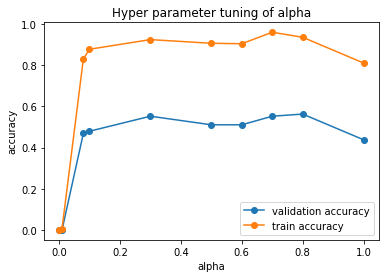

In [203]:
# plt.plot(alpha, train_accuracy, '-o', label='Train')
# plt.ylim(0, 1)
plt.plot(alpha, validation_accuracy, '-o', label='validation accuracy')
plt.plot(alpha, train_accuracy, '-o', label='train accuracy')
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Hyper parameter tuning of alpha")
plt.legend()
plt.show()

In [219]:
#Hyperparameter tuning for chosing number of neurons in hidden layer

# rho = [0.00001, 0.00001, 0.00007, 0.000008, 0.00009]
alpha = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
epochs = [200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
number_of_neurons = [5, 10, 15, 20, 25, 30, 35, 40, 50, 70]
validation_accuracy = []
train_accuracy = []
train_mse = []
for a, n, e in zip(alpha , number_of_neurons, epochs):
  w1, b1, w2, b2, jw, train_accuracy_list, test_accuracy_list, cost_list, epoch_list = MLP(x_train, y_train, n, e, a, False)
  # print(weights)
  print("Alph = ", a,"Number of Hidden neurons = ", n, "epoch = ", e)
  y_pred_train = MLP_pred(x_train, w1, b1, w2, b2)
#    = slp_predict(weights, x_train)
  y_pred_valid = MLP_pred(x_valid, w1, b1, w2, b2)
#   y_pred_valid = slp_predict(weights, x_valid)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_valid = accuracy_score(y_valid, y_pred_valid)
  print("Train Accuracy : ", accuracy_train)
  print("Validation Accuracy : ", accuracy_valid)
  validation_accuracy.append(accuracy_valid)
  train_accuracy.append(accuracy_train)
  train_mse.append(jw)
  print("-"*40)
  # print(cost_list)
  # print(epoch_list)


C:\Users\hp\AppData\Local\Temp/ipykernel_7024/2173386166.py:10: RuntimeWarning: overflow encountered in exp
  bound = 1/(1+ np.exp(- z))
C:\Users\hp\AppData\Local\Temp/ipykernel_7024/2173386166.py:10: RuntimeWarning: overflow encountered in exp
  bound = 1/(1+ np.exp(- z))
C:\Users\hp\AppData\Local\Temp/ipykernel_7024/2173386166.py:10: RuntimeWarning: overflow encountered in exp
  bound = 1/(1+ np.exp(- z))
C:\Users\hp\AppData\Local\Temp/ipykernel_7024/2173386166.py:10: RuntimeWarning: overflow encountered in exp
  bound = 1/(1+ np.exp(- z))
C:\Users\hp\AppData\Local\Temp/ipykernel_7024/2173386166.py:10: RuntimeWarning: overflow encountered in exp
  bound = 1/(1+ np.exp(- z))
C:\Users\hp\AppData\Local\Temp/ipykernel_7024/2173386166.py:10: RuntimeWarning: overflow encountered in exp
  bound = 1/(1+ np.exp(- z))
C:\Users\hp\AppData\Local\Temp/ipykernel_7024/2173386166.py:10: RuntimeWarning: overflow encountered in exp
  bound = 1/(1+ np.exp(- z))
C:\Users\hp\AppData\Local\Temp/ipykernel_

Alph =  0.8 Number of Hidden neurons =  5 epoch =  200
Train Accuracy :  0.33705357142857145
Validation Accuracy :  0.1875
----------------------------------------
Alph =  0.8 Number of Hidden neurons =  10 epoch =  200
Train Accuracy :  0.8169642857142857
Validation Accuracy :  0.53125
----------------------------------------
Alph =  0.8 Number of Hidden neurons =  15 epoch =  200
Train Accuracy :  0.8504464285714286
Validation Accuracy :  0.5104166666666666
----------------------------------------
Alph =  0.8 Number of Hidden neurons =  20 epoch =  200
Train Accuracy :  0.96875
Validation Accuracy :  0.5625
----------------------------------------
Alph =  0.8 Number of Hidden neurons =  25 epoch =  200
Train Accuracy :  0.9598214285714286
Validation Accuracy :  0.5
----------------------------------------
Alph =  0.8 Number of Hidden neurons =  30 epoch =  200
Train Accuracy :  0.9754464285714286
Validation Accuracy :  0.5104166666666666
----------------------------------------
Alph 

In [221]:
df = pd.DataFrame()
df['number_of_neurons'] = number_of_neurons
df['validation accuracy'] = validation_accuracy
df['train accuracy'] = train_accuracy
df['train cost[mse]'] = train_mse
df['Epochs'] = epochs
df.to_csv('Result_exp\mlp_tuning_neurons.csv')

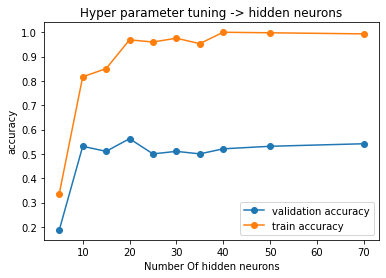

In [223]:
# plt.plot(alpha, train_accuracy, '-o', label='Train')
# plt.ylim(0, 1)
plt.plot(number_of_neurons, validation_accuracy, '-o', label='validation accuracy')
plt.plot(number_of_neurons, train_accuracy, '-o', label='train accuracy')
plt.xlabel("Number Of hidden neurons")
plt.ylabel("accuracy")
plt.title("Hyper parameter tuning -> hidden neurons")
plt.legend()
plt.show()

In [234]:
w1, b1, w2, b2, jw, train_accuracy_list, test_accuracy_list, cost_list, epoch_list = MLP(x_train, y_train, 20, 800, 0.8, True)

Epoch:  1 --> Train Accuracy:  0.13  Test Accuracy:  0.24 Train Cost:  0.55
----------------------------------------------------------------------------------------------------
Epoch:  11 --> Train Accuracy:  0.52  Test Accuracy:  0.35 Train Cost:  0.20
----------------------------------------------------------------------------------------------------
Epoch:  21 --> Train Accuracy:  0.64  Test Accuracy:  0.46 Train Cost:  0.16
----------------------------------------------------------------------------------------------------
Epoch:  31 --> Train Accuracy:  0.73  Test Accuracy:  0.48 Train Cost:  0.13
----------------------------------------------------------------------------------------------------
Epoch:  41 --> Train Accuracy:  0.72  Test Accuracy:  0.48 Train Cost:  0.14
----------------------------------------------------------------------------------------------------
Epoch:  51 --> Train Accuracy:  0.74  Test Accuracy:  0.47 Train Cost:  0.11
----------------------------------

Epoch:  461 --> Train Accuracy:  1.00  Test Accuracy:  0.54 Train Cost:  0.00
----------------------------------------------------------------------------------------------------
Epoch:  471 --> Train Accuracy:  1.00  Test Accuracy:  0.54 Train Cost:  0.00
----------------------------------------------------------------------------------------------------
Epoch:  481 --> Train Accuracy:  1.00  Test Accuracy:  0.54 Train Cost:  0.00
----------------------------------------------------------------------------------------------------
Epoch:  491 --> Train Accuracy:  1.00  Test Accuracy:  0.54 Train Cost:  0.00
----------------------------------------------------------------------------------------------------
Epoch:  501 --> Train Accuracy:  1.00  Test Accuracy:  0.54 Train Cost:  0.00
----------------------------------------------------------------------------------------------------
Epoch:  511 --> Train Accuracy:  1.00  Test Accuracy:  0.54 Train Cost:  0.00
---------------------------

In [235]:
#without checking overfitting
# train_accuracy_list = [ '%.2f' % elem for elem in train_accuracy_list]
# test_accuracy_list = [ '%.2f' % elem for elem in test_accuracy_list]
result = pd.DataFrame( )
result['Epochs'] = epoch_list
result['Train Accuracy'] = train_accuracy_list
result['Test Accuracy'] = test_accuracy_list
result['Train Cost'] =  cost_list
result.to_csv('Result_exp\mlpTrain.csv')
print(result)

    Epochs  Train Accuracy  Test Accuracy  Train Cost
0        1        0.129464       0.239583    0.551566
1       11        0.515625       0.354167    0.201159
2       21        0.636161       0.458333    0.155908
3       31        0.732143       0.479167    0.126701
4       41        0.720982       0.479167    0.139085
..     ...             ...            ...         ...
75     751        0.995536       0.500000    0.000343
76     761        0.995536       0.500000    0.000380
77     771        0.875000       0.500000    0.053112
78     781        0.868304       0.531250    0.062760
79     791        0.904018       0.520833    0.032570

[80 rows x 4 columns]


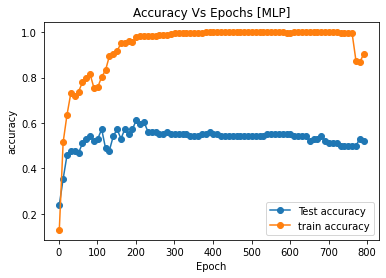

In [238]:
# plt.plot(alpha, train_accuracy, '-o', label='Train')
# plt.ylim(0, 1)
plt.plot(epoch_list, test_accuracy_list, '-o', label='Test accuracy')
plt.plot(epoch_list, train_accuracy_list, '-o', label='train accuracy')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.title("Accuracy Vs Epochs [MLP]")
plt.legend()
plt.show()

In [269]:
kfold_list, train_accuracy, test_accuracy = kfold_cv(x_rescaled, target, 5, 200, 0.8)

******************** KFold -  1 ********************
Train Accuracy:  0.8359375
Test Accuracy:  0.53125
******************** KFold -  2 ********************
Train Accuracy:  0.8828125
Test Accuracy:  0.59375
******************** KFold -  3 ********************
Train Accuracy:  0.861328125
Test Accuracy:  0.6328125
******************** KFold -  4 ********************
Train Accuracy:  0.95703125
Test Accuracy:  0.6328125
******************** KFold -  5 ********************
Train Accuracy:  0.8671875
Test Accuracy:  0.484375
-----------------Done Kfold----------------


In [270]:
#Save the data to excel sheet
train_accuracy_list = [ '%.2f' % elem for elem in train_accuracy]
test_accuracy_list = [ '%.2f' % elem for elem in test_accuracy]
result = pd.DataFrame( )
result['Fold Number'] = kfold_list
result['Train Accuracy'] = train_accuracy_list
result['Test Accuracy'] = test_accuracy_list
# result['Test Cost'] =  test_cost
# result['total cost'] = total_cost
result.to_csv('Result_exp\mlp_kfold.csv')
print(result)

   Fold Number Train Accuracy Test Accuracy
0            1           0.84          0.53
1            2           0.88          0.59
2            3           0.86          0.63
3            4           0.96          0.63
4            5           0.87          0.48


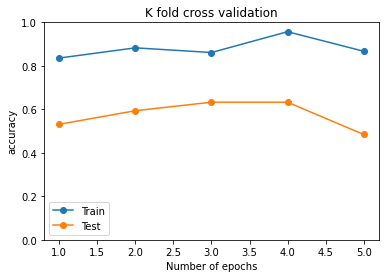

In [271]:
plt.ylim(0, 1)
plt.plot(kfold_list,train_accuracy, '-o', label='Train')
plt.plot(kfold_list,test_accuracy, '-o', label='Test')
plt.xlabel("Number of epochs")
plt.ylabel("accuracy")
plt.title("K fold cross validation")
plt.legend()
plt.show()